### Building a model on customer churn binary classification

Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Scale the features either by using normalizer or a standard scaler.
- Split the data into a training set and a test set.
- Fit a logistic Regression model on the training data.
- Fit a Knn Classifier model on the training data

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier to use the K-NN for classification
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.tree import plot_tree


import pickle

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 100

In [2]:
churnData = pd.read_csv ('DATA_Customer-Churn.csv')
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [3]:
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"],errors="coerce")

In [4]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [5]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
churnData['TotalCharges'].fillna(value=churnData['TotalCharges'].mean(), inplace=True)

Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges. Scale the features either by using normalizer or a standard scaler.

In [7]:
churnData.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
def drop_columns(churnData):
    churnData.drop(columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'Churn'], inplace=True)
    return churnData

In [9]:
drop_columns(churnData)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [10]:
scaler = StandardScaler()
scaler.fit(churnData)
churn_scaled = scaler.transform(churnData)
churn_scaled_df = pd.DataFrame(churn_scaled, columns = churnData.columns)
display(churnData.head())
print()
display(churn_scaled_df.head())

StandardScaler()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439916,-1.277445,-1.160323,-0.994971
1,-0.439916,0.066327,-0.259629,-0.173876
2,-0.439916,-1.236724,-0.362660,-0.960399
3,-0.439916,0.514251,-0.746535,-0.195400
4,-0.439916,-1.236724,0.197365,-0.941193


In [59]:
churn_scaled_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439916,-1.277445,-1.160323,-0.994971
1,-0.439916,0.066327,-0.259629,-0.173876
2,-0.439916,-1.236724,-0.362660,-0.960399
3,-0.439916,0.514251,-0.746535,-0.195400
4,-0.439916,-1.236724,0.197365,-0.941193
...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.129281
7039,-0.439916,1.613701,1.277533,2.242808
7040,-0.439916,-0.870241,-1.168632,-0.855182
7041,2.273159,-1.155283,0.320338,-0.872777


Split the data into a training set and a test set.

In [11]:
churn_Data = pd.read_csv ('DATA_Customer-Churn.csv')
churn_Data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [12]:
#def drop_columns2(churn_Data):
    #churn_Data.drop(columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       #'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       #'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       #'MonthlyCharges', 'TotalCharges'], inplace=True)
    #return churn_Data

In [13]:
#drop_columns2(churn_Data)

In [14]:
y=churn_Data.Churn
type(y)

pandas.core.series.Series

In [15]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [16]:
X=churn_scaled_df
#y=churn_Data


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439916,-1.277445,-1.160323,-0.994971
1,-0.439916,0.066327,-0.259629,-0.173876
2,-0.439916,-1.236724,-0.362660,-0.960399
3,-0.439916,0.514251,-0.746535,-0.195400
4,-0.439916,-1.236724,0.197365,-0.941193
...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.129281
7039,-0.439916,1.613701,1.277533,2.242808
7040,-0.439916,-0.870241,-1.168632,-0.855182
7041,2.273159,-1.155283,0.320338,-0.872777


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

Fit a logistic Regression model on the training data.

PowerTransformer()

LogisticRegression()

,Error_metric,Train,Test
0,Accuracy,0.800406,0.773308
1,Precision,0.668187,0.650407
2,Recall,0.458170,0.406780


Confusion matrix for the train set
[[3360  291]
 [ 693  586]]


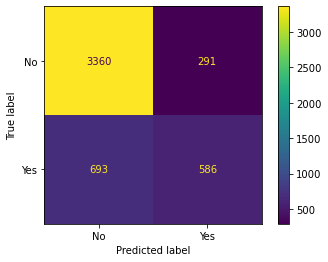



Confusion matrix for the test set
[[1394  129]
 [ 350  240]]


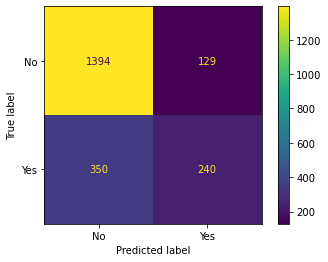

In [18]:
log_model = LogisticRegression() 

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label = 'Yes'),
                                         recall_score(y_train, y_pred_train_log,pos_label = 'Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label = 'Yes'),
                                        recall_score(y_test, y_pred_test_log,pos_label = 'Yes')]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

Fit a Knn Classifier model on the training data

In [19]:
trans = PowerTransformer()
model = KNeighborsClassifier()

# define X and y (features and target)
#X = data.drop(columns = ['Id','SalePrice'])
#y = np.log(data['SalePrice']) # The model will try to predict the log(SalePrice) instead of the real price

# data splitting
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# transforming data
trans.fit(X_train)

X_train = trans.transform(X_train)
X_test  = trans.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test,  columns = X.columns)

# model
model.fit(X_train, y_train)

y_pred_train_lm = model.predict(X_train)
y_pred_test_lm  = model.predict(X_test)

PowerTransformer()

KNeighborsClassifier()

In [20]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [21]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.440119,0.537329,-0.594923,0.346914
1,-0.440119,0.647427,-0.402940,0.526879
2,-0.440119,-1.275532,-1.402586,-1.285507
3,-0.440119,-0.734678,-0.727478,-0.754658
4,-0.440119,-1.377243,-1.419851,-1.328294
...,...,...,...,...
4925,-0.440119,-1.428462,-1.421177,0.356052
4926,-0.440119,0.896065,-0.143548,0.811046
4927,-0.440119,-0.734678,0.722276,-0.268118
4928,2.272114,-0.056405,-0.985285,-0.442341


In [23]:
type(y_train)

pandas.core.series.Series

In [24]:
trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

y_pred_train_knn = model.predict(X_train_mod)
y_pred_test_knn = model.predict(X_test_mod)

model.fit(X_train_mod, y_train)

y_pred_train_knn = model.predict(X_train_mod)
y_pred_test_knn = model.predict(X_test_mod)

PowerTransformer()

KNeighborsClassifier()

,Error_metric,Train,Test
0,Accuracy,0.839351,0.754851
1,Precision,0.725672,0.572581
2,Recall,0.612197,0.481356


Confusion matrix for the train set
[[3355  296]
 [ 496  783]]


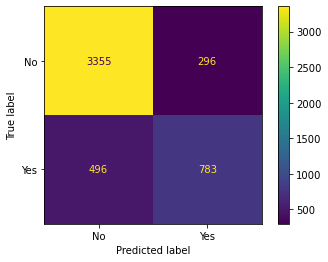



Confusion matrix for the test set
[[1311  212]
 [ 306  284]]


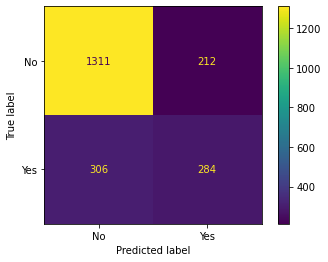

In [25]:
performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn,pos_label = 'Yes'),
                                         recall_score(y_train, y_pred_train_knn,pos_label = 'Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn,pos_label = 'Yes'),
                                        recall_score(y_test, y_pred_test_knn,pos_label = 'Yes')]})

display(performance_knn)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(model,X_train_mod,y_train, values_format= 'd') 
plt.show();

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(model,X_test_mod,y_test, values_format= 'd') 
plt.show();

In [26]:
full = pd.DataFrame()

models = {'k': [] }

for k in range(2,21):

    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)

    models['k'] = [k, neigh]

    y_pred_train_knn = neigh.predict(X_train)
    y_pred_test_knn  = neigh.predict(X_test)
    
    performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn,pos_label = 'Yes'),
                                         recall_score(y_train, y_pred_train_knn,pos_label = 'Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn,pos_label = 'Yes'),
                                        recall_score(y_test, y_pred_test_knn,pos_label = 'Yes')]})

    #performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
    temp = pd.DataFrame({'k': [k]*3, 'Error_metric': performance_knn['Error_metric'], 
                         'Train': performance_knn['Train'], 'Test': performance_knn['Test']})
    full = pd.concat([full,temp], axis=0)

full

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=16)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=20)

,k,Error_metric,Train,Test
0,2,Accuracy,0.868763,0.751538
1,2,Precision,0.987654,0.607261
2,2,Recall,0.500391,0.311864
0,3,Accuracy,0.866531,0.750118
1,3,Precision,0.777480,0.563265
2,3,Recall,0.680219,0.467797
0,4,Accuracy,0.841785,0.760057
1,4,Precision,0.817027,0.617564
2,4,Recall,0.502737,0.369492
0,5,Accuracy,0.839554,0.753431


In [27]:
full[full['Error_metric'] == 'Accuracy']

,k,Error_metric,Train,Test
0,2,Accuracy,0.868763,0.751538
0,3,Accuracy,0.866531,0.750118
0,4,Accuracy,0.841785,0.760057
0,5,Accuracy,0.839554,0.753431
0,6,Accuracy,0.836511,0.765263
0,7,Accuracy,0.830629,0.761950
0,8,Accuracy,0.829817,0.768102
0,9,Accuracy,0.824746,0.766682
0,10,Accuracy,0.825355,0.769522
0,11,Accuracy,0.822515,0.767629


In [28]:
full2 = full.melt(id_vars=["k","Error_metric"])
full2

,k,Error_metric,variable,value
0,2,Accuracy,Train,0.868763
1,2,Precision,Train,0.987654
2,2,Recall,Train,0.500391
3,3,Accuracy,Train,0.866531
4,3,Precision,Train,0.777480
...,...,...,...,...
109,19,Precision,Test,0.636585
110,19,Recall,Test,0.442373
111,20,Accuracy,Test,0.776621
112,20,Precision,Test,0.659459


<AxesSubplot:xlabel='k', ylabel='value'>

Text(0.5, 1.0, 'Accuracy')

<AxesSubplot:xlabel='k', ylabel='value'>

Text(0.5, 1.0, 'Recall')

<AxesSubplot:xlabel='k', ylabel='value'>

Text(0.5, 1.0, 'Precision')

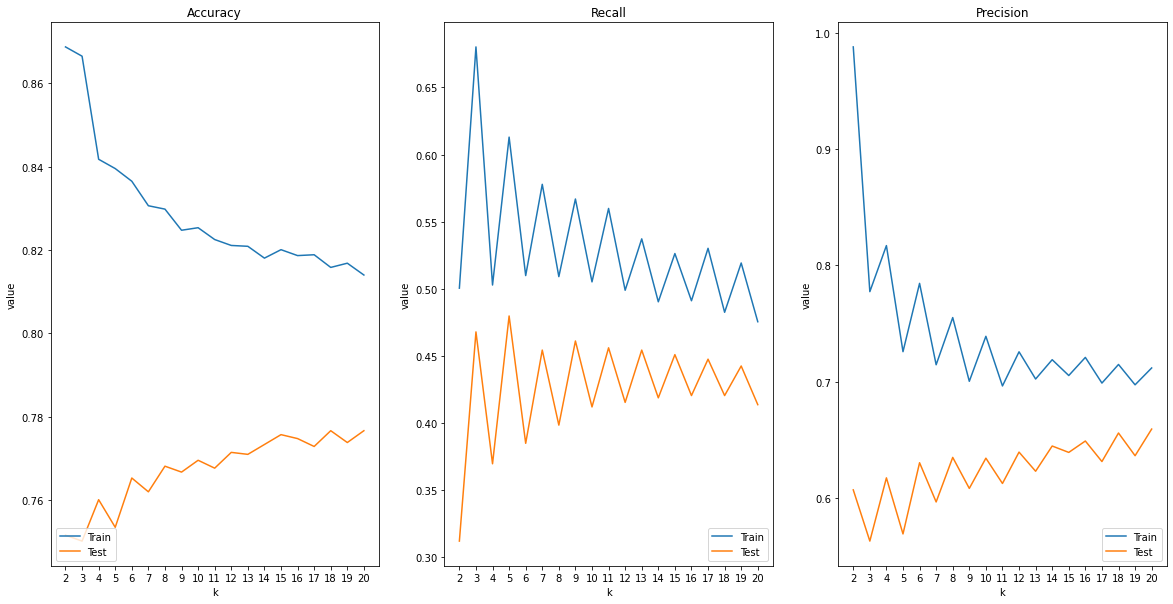

In [29]:
fig, ax = plt.subplots(1,3, figsize=(20,10))
sns.lineplot(x = "k", y = "value", data = full2[full2["Error_metric"] == "Accuracy"], hue = "variable", ax = ax[0])
ax[0].set_xticks(range(2,21))
ax[0].set_title("Accuracy")
ax[0].legend(loc="lower left")
sns.lineplot(x = "k", y = "value", data = full2[full2["Error_metric"] == "Recall"], hue = "variable", ax = ax[1])
ax[1].set_xticks(range(2,21))
ax[1].set_title("Recall")
ax[1].legend(loc="lower right")
sns.lineplot(x = "k", y = "value", data = full2[full2["Error_metric"] == "Precision"], hue = "variable", ax = ax[2])
ax[2].set_xticks(range(2,21))
ax[2].set_title("Precision")
ax[2].legend(loc="lower right")

Round 2

- Fit a Decision Tree Classifier on the training data.
- Check the accuracy on the test data.         

DecisionTreeClassifier(max_depth=3)

,Error_metric,Train,Test
0,Accuracy,0.791684,0.766209
1,Precision,0.656716,0.633333
2,Recall,0.412823,0.386441


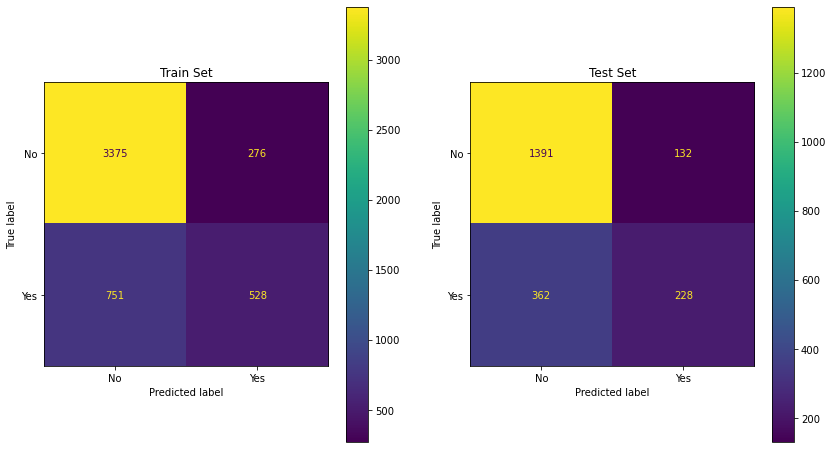

In [30]:
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt,pos_label = 'Yes'),
                                         recall_score(y_train, y_pred_train_dt,pos_label = 'Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt,pos_label = 'Yes'),
                                        recall_score(y_test, y_pred_test_dt,pos_label = 'Yes')]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

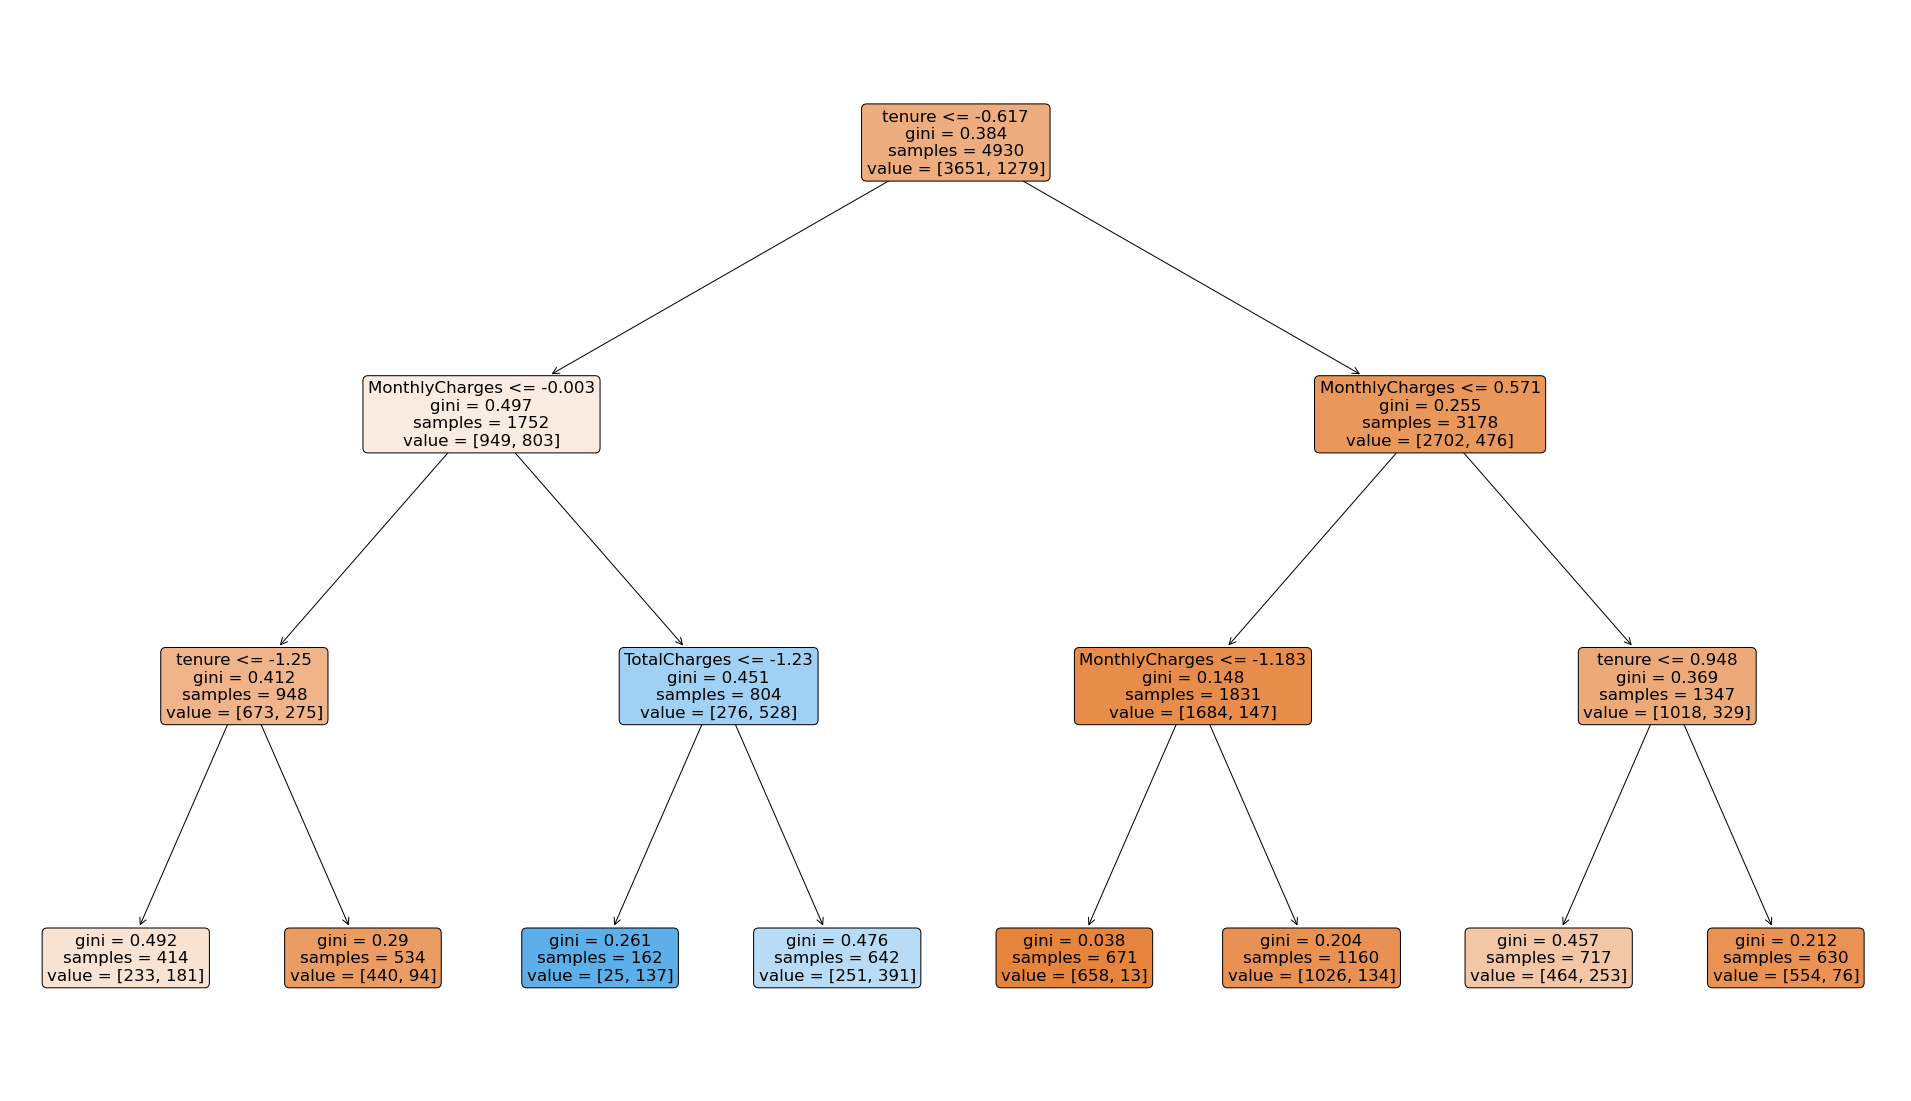

In [31]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X.columns)
plt.show();

Round 3

apply K-fold cross validation on your models before and check the model score. Note: So far we have not balanced the data.

In [32]:
print(X.shape)
print(y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
mo= DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

(7043, 4)
(7043,)


KNeighborsClassifier()

0.7842441447835344

In [33]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [34]:
set(y)

{'No', 'Yes'}

In [35]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.77994676, 0.7675244 , 0.7515528 , 0.77994676, 0.74600355])

In [36]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.76 accuracy with a standard deviation of 0.01


In [37]:
y_test

3608    Yes
3572     No
6227    Yes
59       No
6941     No
       ... 
4113     No
6670     No
4135     No
1536     No
6105    Yes
Name: Churn, Length: 1409, dtype: object

In [38]:
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

Models comparison

In [39]:
model1 = DecisionTreeRegressor()

model2 = LinearRegression()

model3 = KNeighborsRegressor()


model_pipeline = [model1, model2, model3]
model_names = ['Regression Tree', 'Linear Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Regression Tree': nan, 'Linear Regression': nan, 'KNN': nan}


Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

Downsampling

In [40]:
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [41]:
5174/len(y)

0.7346301292063041

In [42]:
target_df = pd.DataFrame(y)

In [43]:
target_df

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [44]:
category_0 = target_df[target_df['Churn'] == 'No']
category_1 = target_df[target_df['Churn'] ==  'Yes']

In [45]:
category_0_down = category_0.sample(len(category_1))
print(category_0_down.shape)
print(category_1.shape)

(1869, 1)
(1869, 1)


In [46]:
data = pd.concat([category_0_down, category_1], axis=0)
#shuffling the data
data = data.sample(frac=1)

data['Churn'].value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

In [66]:
data

,Churn
3470,No
3021,No
937,Yes
5098,Yes
1603,Yes
...,...
2871,Yes
3124,No
959,No
1751,Yes


In [75]:
df_down = pd.concat([churn_scaled_df.iloc[data.index], data], axis=1)

In [76]:
df_down

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
3470,-0.439916,-0.992402,-0.447412,-0.826416,No
3021,-0.439916,-1.114563,-1.489359,-0.960885,No
937,-0.439916,-1.073843,0.474885,-0.816305,Yes
5098,2.273159,-1.196004,0.406752,-0.903177,Yes
1603,-0.439916,-0.707359,-0.003712,-0.569025,Yes
...,...,...,...,...,...
2871,-0.439916,-0.748080,0.709199,-0.462616,Yes
3124,-0.439916,1.450820,0.601182,1.542339,No
959,-0.439916,-0.015113,0.709199,0.194473,No
1751,-0.439916,-0.748080,0.837157,-0.487849,Yes


In [78]:
y=df_down.Churn
y

3470     No
3021     No
937     Yes
5098    Yes
1603    Yes
       ... 
2871    Yes
3124     No
959      No
1751    Yes
1649     No
Name: Churn, Length: 3738, dtype: object

In [79]:
def drop_columns(df_down):
    df_down.drop(columns=['Churn'], inplace=True)
    return df_down

In [89]:
drop_columns(df_down)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3470,-0.439916,-0.992402,-0.447412,-0.826416
3021,-0.439916,-1.114563,-1.489359,-0.960885
937,-0.439916,-1.073843,0.474885,-0.816305
5098,2.273159,-1.196004,0.406752,-0.903177
1603,-0.439916,-0.707359,-0.003712,-0.569025
...,...,...,...,...
2871,-0.439916,-0.748080,0.709199,-0.462616
3124,-0.439916,1.450820,0.601182,1.542339
959,-0.439916,-0.015113,0.709199,0.194473
1751,-0.439916,-0.748080,0.837157,-0.487849


In [90]:
X=df_down

In [91]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3470,-0.439916,-0.992402,-0.447412,-0.826416
3021,-0.439916,-1.114563,-1.489359,-0.960885
937,-0.439916,-1.073843,0.474885,-0.816305
5098,2.273159,-1.196004,0.406752,-0.903177
1603,-0.439916,-0.707359,-0.003712,-0.569025
...,...,...,...,...
2871,-0.439916,-0.748080,0.709199,-0.462616
3124,-0.439916,1.450820,0.601182,1.542339
959,-0.439916,-0.015113,0.709199,0.194473
1751,-0.439916,-0.748080,0.837157,-0.487849


In [92]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

PowerTransformer()

LogisticRegression()

,Error_metric,Train,Test
0,Accuracy,0.729740,0.739750
1,Precision,0.716058,0.733221
2,Recall,0.755196,0.766667


Confusion matrix for the train set
[[928 389]
 [318 981]]


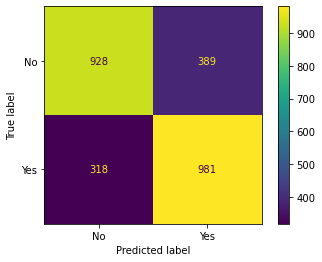



Confusion matrix for the test set
[[393 159]
 [133 437]]


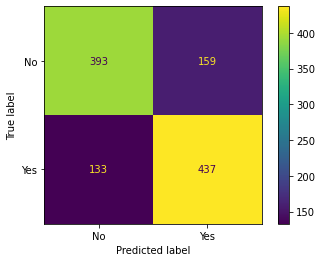

In [93]:
log_model = LogisticRegression() 

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label = 'Yes'),
                                         recall_score(y_train, y_pred_train_log,pos_label = 'Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label = 'Yes'),
                                        recall_score(y_test, y_pred_test_log,pos_label = 'Yes')]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

In [94]:
trans = PowerTransformer()
model = KNeighborsClassifier()

# define X and y (features and target)
#X = data.drop(columns = ['Id','SalePrice'])
#y = np.log(data['SalePrice']) # The model will try to predict the log(SalePrice) instead of the real price

# data splitting
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# transforming data
trans.fit(X_train)

X_train = trans.transform(X_train)
X_test  = trans.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test,  columns = X.columns)

# model
model.fit(X_train, y_train)

y_pred_train_lm = model.predict(X_train)
y_pred_test_lm  = model.predict(X_test)

PowerTransformer()

KNeighborsClassifier()

In [95]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [96]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [100]:
trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

y_pred_train_knn = model.predict(X_train_mod)
y_pred_test_knn = model.predict(X_test_mod)

model.fit(X_train_mod, y_train)

y_pred_train_knn = model.predict(X_train_mod)
y_pred_test_knn = model.predict(X_test_mod)

PowerTransformer()

KNeighborsClassifier()

,Error_metric,Train,Test
0,Accuracy,0.792431,0.710339
1,Precision,0.788550,0.707276
2,Recall,0.795227,0.733333


Confusion matrix for the train set
[[1040  277]
 [ 266 1033]]


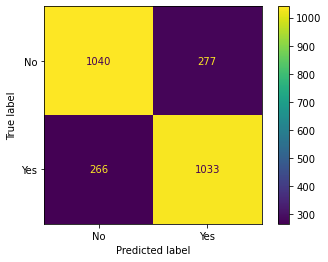



Confusion matrix for the test set
[[379 173]
 [152 418]]


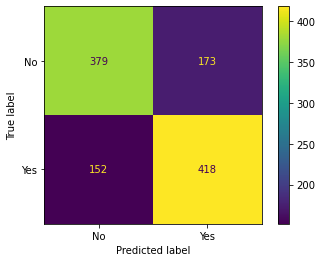

In [101]:
performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn,pos_label = 'Yes'),
                                         recall_score(y_train, y_pred_train_knn,pos_label = 'Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn,pos_label = 'Yes'),
                                        recall_score(y_test, y_pred_test_knn,pos_label = 'Yes')]})

display(performance_knn)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(model,X_train_mod,y_train, values_format= 'd') 
plt.show();

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(model,X_test_mod,y_test, values_format= 'd') 
plt.show();

DecisionTreeClassifier(max_depth=3)

,Error_metric,Train,Test
0,Accuracy,0.724006,0.725490
1,Precision,0.682942,0.685552
2,Recall,0.829099,0.849123


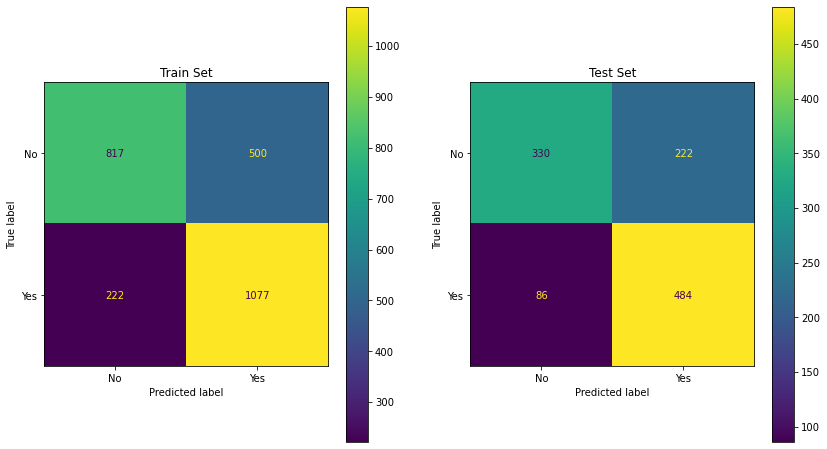

In [102]:
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt,pos_label = 'Yes'),
                                         recall_score(y_train, y_pred_train_dt,pos_label = 'Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt,pos_label = 'Yes'),
                                        recall_score(y_test, y_pred_test_dt,pos_label = 'Yes')]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

Upsampling Method

In [103]:
category_1_up = category_1.sample(len(category_0), replace=True)
print(category_1_up.shape)

(5174, 1)


In [104]:
data = pd.concat([category_0, category_1_up], axis=0)
#shuffling the data
data = data.sample(frac=1)
data['Churn'].value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [106]:
df_down = pd.concat([churn_scaled_df.iloc[data.index], data], axis=1)
y=df_down.Churn

In [107]:
def drop_columns(df_down):
    df_down.drop(columns=['Churn'], inplace=True)
    return df_down

In [108]:
drop_columns(df_down)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6015,-0.439916,-1.196004,0.325324,-0.904987
1696,-0.439916,-1.196004,0.682610,-0.891233
4593,-0.439916,-0.870241,-1.477726,-0.899402
3631,2.273159,-1.277445,-0.505575,-0.986273
5516,-0.439916,-1.155283,-0.432456,-0.919359
...,...,...,...,...
3473,-0.439916,0.392090,1.375579,0.984352
5649,-0.439916,0.025607,-1.486035,-0.712567
6086,-0.439916,1.165777,0.170776,0.858074
5831,-0.439916,-0.951682,0.865408,-0.650620


In [109]:
X=df_down
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

PowerTransformer()

LogisticRegression()

,Error_metric,Train,Test
0,Accuracy,0.739335,0.739775
1,Precision,0.729573,0.732911
2,Recall,0.762534,0.750000


Confusion matrix for the train set
[[2587 1026]
 [ 862 2768]]


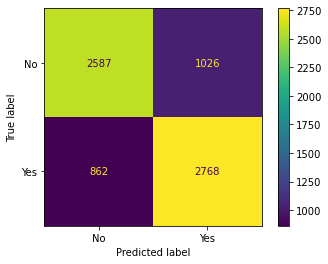



Confusion matrix for the test set
[[1139  422]
 [ 386 1158]]


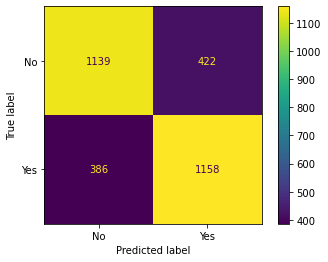

In [110]:
log_model = LogisticRegression() 

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label = 'Yes'),
                                         recall_score(y_train, y_pred_train_log,pos_label = 'Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label = 'Yes'),
                                        recall_score(y_test, y_pred_test_log,pos_label = 'Yes')]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

In [111]:
trans = PowerTransformer()
model = KNeighborsClassifier()

# define X and y (features and target)
#X = data.drop(columns = ['Id','SalePrice'])
#y = np.log(data['SalePrice']) # The model will try to predict the log(SalePrice) instead of the real price

# data splitting
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# transforming data
trans.fit(X_train)

X_train = trans.transform(X_train)
X_test  = trans.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test,  columns = X.columns)

# model
model.fit(X_train, y_train)

y_pred_train_lm = model.predict(X_train)
y_pred_test_lm  = model.predict(X_test)

PowerTransformer()

KNeighborsClassifier()

In [112]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [113]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [114]:
trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

y_pred_train_knn = model.predict(X_train_mod)
y_pred_test_knn = model.predict(X_test_mod)

model.fit(X_train_mod, y_train)

y_pred_train_knn = model.predict(X_train_mod)
y_pred_test_knn = model.predict(X_test_mod)

PowerTransformer()

KNeighborsClassifier()

,Error_metric,Train,Test
0,Accuracy,0.841502,0.766184
1,Precision,0.803127,0.734788
2,Recall,0.905785,0.829016


Confusion matrix for the train set
[[2807  806]
 [ 342 3288]]


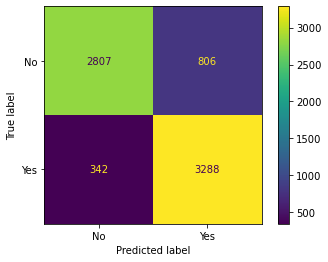



Confusion matrix for the test set
[[1099  462]
 [ 264 1280]]


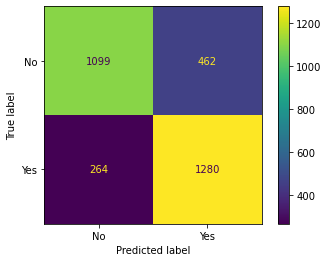

In [115]:
performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn,pos_label = 'Yes'),
                                         recall_score(y_train, y_pred_train_knn,pos_label = 'Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn,pos_label = 'Yes'),
                                        recall_score(y_test, y_pred_test_knn,pos_label = 'Yes')]})

display(performance_knn)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(model,X_train_mod,y_train, values_format= 'd') 
plt.show();

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(model,X_test_mod,y_test, values_format= 'd') 
plt.show();

DecisionTreeClassifier(max_depth=3)

,Error_metric,Train,Test
0,Accuracy,0.734916,0.732367
1,Precision,0.710074,0.707872
2,Recall,0.796143,0.786269


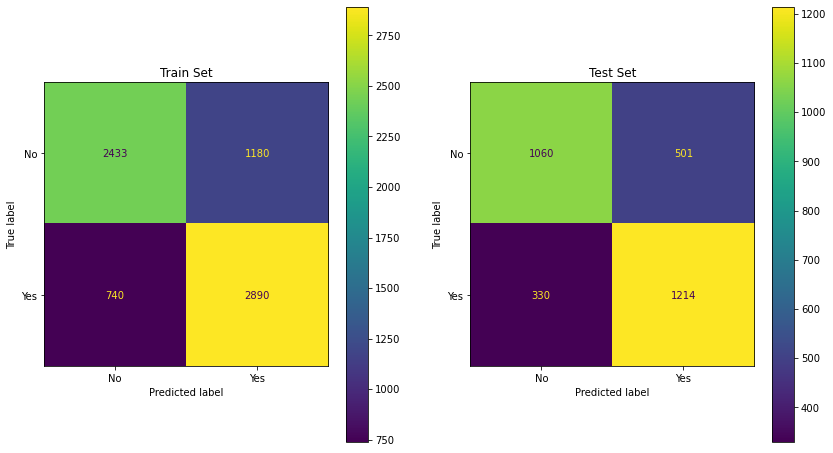

In [116]:
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt,pos_label = 'Yes'),
                                         recall_score(y_train, y_pred_train_dt,pos_label = 'Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt,pos_label = 'Yes'),
                                        recall_score(y_test, y_pred_test_dt,pos_label = 'Yes')]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

Upsampling using SMOTE

In [117]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [119]:
data = pd.concat([target_df, churn_scaled_df], axis=1)
#data = data.drop(['Churn'], axis=1)
y = data['Churn']
X = data.drop(['Churn'], axis=1)

In [120]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

In [124]:
df_down = pd.concat([target_df, churn_scaled_df], axis=1)
y=df_down.Churn

In [125]:
def drop_columns(df_down):
    df_down.drop(columns=['Churn'], inplace=True)
    return df_down

In [126]:
drop_columns(df_down)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439916,-1.277445,-1.160323,-0.994971
1,-0.439916,0.066327,-0.259629,-0.173876
2,-0.439916,-1.236724,-0.362660,-0.960399
3,-0.439916,0.514251,-0.746535,-0.195400
4,-0.439916,-1.236724,0.197365,-0.941193
...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.129281
7039,-0.439916,1.613701,1.277533,2.242808
7040,-0.439916,-0.870241,-1.168632,-0.855182
7041,2.273159,-1.155283,0.320338,-0.872777


In [127]:
X=df_down
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

PowerTransformer()

LogisticRegression()

,Error_metric,Train,Test
0,Accuracy,0.800406,0.773308
1,Precision,0.668187,0.650407
2,Recall,0.458170,0.406780


Confusion matrix for the train set
[[3360  291]
 [ 693  586]]


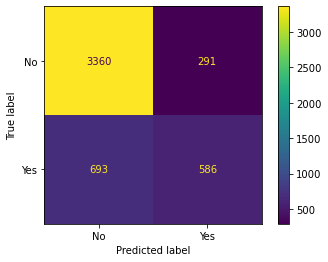



Confusion matrix for the test set
[[1394  129]
 [ 350  240]]


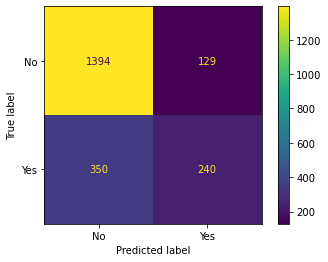

In [128]:
log_model = LogisticRegression() 

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label = 'Yes'),
                                         recall_score(y_train, y_pred_train_log,pos_label = 'Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label = 'Yes'),
                                        recall_score(y_test, y_pred_test_log,pos_label = 'Yes')]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

In [129]:
trans = PowerTransformer()
model = KNeighborsClassifier()

# define X and y (features and target)
#X = data.drop(columns = ['Id','SalePrice'])
#y = np.log(data['SalePrice']) # The model will try to predict the log(SalePrice) instead of the real price

# data splitting
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# transforming data
trans.fit(X_train)

X_train = trans.transform(X_train)
X_test  = trans.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test,  columns = X.columns)

# model
model.fit(X_train, y_train)

y_pred_train_lm = model.predict(X_train)
y_pred_test_lm  = model.predict(X_test)

PowerTransformer()

KNeighborsClassifier()

In [130]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [131]:
trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

y_pred_train_knn = model.predict(X_train_mod)
y_pred_test_knn = model.predict(X_test_mod)

model.fit(X_train_mod, y_train)

y_pred_train_knn = model.predict(X_train_mod)
y_pred_test_knn = model.predict(X_test_mod)

PowerTransformer()

KNeighborsClassifier()

,Error_metric,Train,Test
0,Accuracy,0.839351,0.754851
1,Precision,0.725672,0.572581
2,Recall,0.612197,0.481356


Confusion matrix for the train set
[[3355  296]
 [ 496  783]]


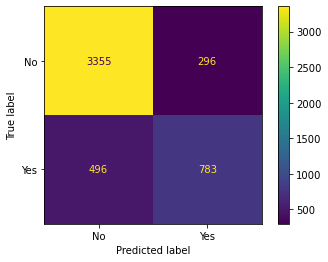



Confusion matrix for the test set
[[1311  212]
 [ 306  284]]


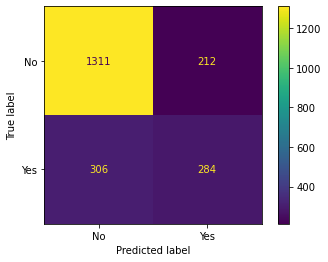

In [132]:
performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn,pos_label = 'Yes'),
                                         recall_score(y_train, y_pred_train_knn,pos_label = 'Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn,pos_label = 'Yes'),
                                        recall_score(y_test, y_pred_test_knn,pos_label = 'Yes')]})

display(performance_knn)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(model,X_train_mod,y_train, values_format= 'd') 
plt.show();

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(model,X_test_mod,y_test, values_format= 'd') 
plt.show();

DecisionTreeClassifier(max_depth=3)

,Error_metric,Train,Test
0,Accuracy,0.791684,0.766209
1,Precision,0.656716,0.633333
2,Recall,0.412823,0.386441


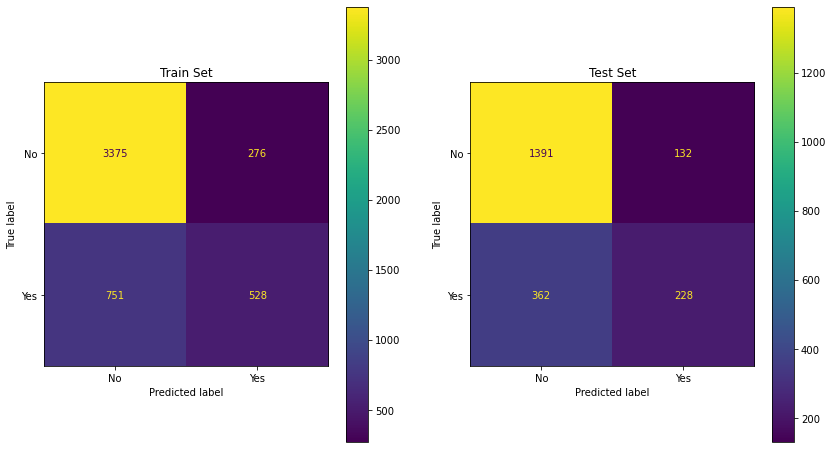

In [133]:
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt,pos_label = 'Yes'),
                                         recall_score(y_train, y_pred_train_dt,pos_label = 'Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt,pos_label = 'Yes'),
                                        recall_score(y_test, y_pred_test_dt,pos_label = 'Yes')]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

Downsampling using Tomeklinks

In [134]:
#data = pd.concat([numerical, targets], axis=1)
#y = data['TARGET_B']
#X = data.drop(['TARGET_B'], axis=1)
#y.value_counts()

In [135]:
from imblearn.under_sampling import TomekLinks

#tl = TomekLinks('majority')
#X_tl, y_tl = tl.fit_resample(X, y)
#y_tl.value_counts()